# CAMELS survey example

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from synthesizer.grid import Grid
from synthesizer.load_data import load_CAMELS_SIMBA
from synthesizer.filters import UVJ
from synthesizer.survey import Survey

In [24]:
grid_dir = '../../../tests/test_grid'
grid_name = 'test_grid'
grid = Grid(grid_name, grid_dir=grid_dir)

In [25]:
gals = load_CAMELS_SIMBA('../../../tests/', 
                         snap_name='camels_snap.hdf5', 
                         fof_name='camels_subhalo.hdf5')

mstar = np.log10(np.array([np.sum(_g.stars.initial_masses)
                           for _g in gals]) * 1e10)

Set up a filter collection object (UVJ default)

In [26]:
fc = UVJ(new_lam=grid.lam)

Convert gals to an array

In [27]:
gals = np.array(gals)

Create an empty Survey object

In [28]:
survey = Survey(super_resolution_factor=1)

Let's add the filters to an instrument in the survey

In [29]:
survey.add_photometric_instrument(filters=fc, label="UVJ")

Store the galaxies in the survey

In [30]:
survey.add_galaxies(gals)

Get the SEDs

In [31]:
survey.get_integrated_stellar_spectra(grid)

# survey.get_integrated_spectra_screen(tauV=0.33)

survey.get_integrated_spectra_charlot_fall_00(grid, tauV_ISM=0.33, tauV_BC=0.67)

survey.seds

{'stellar': <synthesizer.sed.Sed at 0x7f8af19c9c00>,
 'attenuated': <synthesizer.sed.Sed at 0x7f8af19cb2e0>}

Compute the photometry in UVJ filters

Text(0.5, 0, 'J')

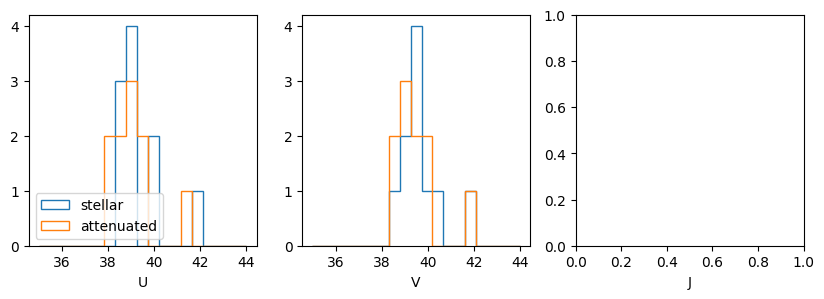

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

for spectra_type, c in zip(['stellar', 'attenuated'],
                           [mstar, 'grey']):
    survey.get_photometry(spectra_type=spectra_type)
    _UVJ = survey.photometry

    UV = _UVJ['U'] / _UVJ['V']
    VJ = _UVJ['V'] / _UVJ['J']

    bins = np.linspace(35, 44, 20)
    ax1.hist(np.log10(_UVJ['U'].value), label=spectra_type, 
             histtype='step', bins=bins)
    ax2.hist(np.log10(_UVJ['V'].value), label=spectra_type, 
             histtype='step', bins=bins)
    # ax3.hist(np.log10(_UVJ['J'].value), label=spectra_type, 
    #          histtype='step', bins=bins)
    
ax1.legend()
ax1.set_xlabel('U')
ax2.set_xlabel('V')
ax3.set_xlabel('J')